<center><h2>Midterm - Data Science option</h2></center>

This is one of two options for the midterm. 

This option is in-depth analysis of online shopping behavior.  

We are asking you to do intensive analysis of consumer behavioral data.

The data
----

The dataset is from "Online Shoppers Purchasing Intention Dataset Data Set" https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

The data is in the file "online_shoppers_intention.csv". 

- The dataset consists of 10 numerical and 8 categorical variables.
- The 'Revenue' variable can be used as the target label. This variable is imbalanced, such that 84.5% of user journeys did NOT result in a purchase (Revenue=False)
- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
- The values of these features are derived from the URL information of the pages visited by the user and updated when a user takes an action, e.g. moving from one page to another. 
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
- The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
- The value of "Exit Rate" feature for a specific web page is calculated as for all page views to the page and it represents the percentage that the page was seen in the last session. 
- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day or Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a boolean value indicating whether the date of the visit is weekend, and month of the year.

The tasks
-----

Perform the following tasks:

1. Task 1 - Build a highly predictive classification model. Train the model on data entries corresponding to the months of June-Dec, and test the model on data entries corresponding to Feb-March. (50 points)

    1. Fit a logistic regression and at least one other classification model. Find and explain important features. 
    1. Report and interpret the most meaningful classifications metrics
    1. Show and explain the hyper-parameter fitting process.

    Point breakdown:
    
    - (10 points) Basic exploratory data analysis (EDA) 
        - Appropriate univariate descriptive statistics and figures
        - Appropriate bivariate descriptive statistics and figures
    - ( 5 points) Advanced EDA
        - Free-response, shows us what they know! 
    - ( 5 points) Train/test split
    - (10 points) Feature selection
    - (15 points) Model fitting
    - ( 5 points) Performance points 
        - F1 score is in the top quartile among all students 


2.  Task 2: Generate user-behavior clusters based on the purchasing behavior data for the complete dataset.  (25 points).

    1. How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters as you can.
    2. Return plots and cluster images generated for the data.
    3. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g,. which cluster represent new shoppers vs. brand conscious shoppers etc.).
    
    Point breakdown:
    
    - (15 points) Clustering code
    - (10 points) Clustering analysis

3. Task 3: Consider you have training data (with the 'Revenue' attribute) for records from June-Sept only. For all records from Oct-Dec, the 'Revenue' attribute is missing. Build a semi-supervised self-labeling model to estimate 'Revenue' for the missing records in Oct-Dec and then fit your classifier. Report classification performance on Feb-March data set with and without the self-labeled data. (15 points)

    1. If you do not consider the records from Oct-Dec, generate the classification performance on test data
    2. After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.

    Point breakdown:
    
    - ( 2 points) Correctly splits the data by month into labeled, unlabeled, and test 
    - (8 points) Generate labels for unlabeled samples with a self labeling technique
    - (5 points) Compare and contrast performance difference on test dataset between labels only and labels & self-labels.

-----

Remaining points breakdown:
 - (10 points) Style and clarity
     - Please attempt to write clear, well-commented code and explanations in markdown cells, where appropriate. 

------

Your deliverables:

- Code in a single .ipynb notebook.
- Comments where appropriate.
- Figures, graphs, and tables where appropriate.
- Text explanations (in markdown cells) of what is being done and why.

__That's it. Good Luck!__

<br>
<br> 
<br>

----

Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.decomposition import TruncatedSVD
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelSpreading
from scipy.sparse import vstack
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest

In [2]:
pip install category_encoders

     |████████████████████████████████| 86 kB 4.3 MB/s 


In [3]:
from category_encoders import OrdinalEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing the data set

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/FourthBrain/Assignments/Midterm/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.shape

(12330, 18)

EDA

In [7]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [8]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Labels

The charts below show that this is an imbalanced dataset, as only 2000 interactions, out of over 12000, have resulted in a purchase.

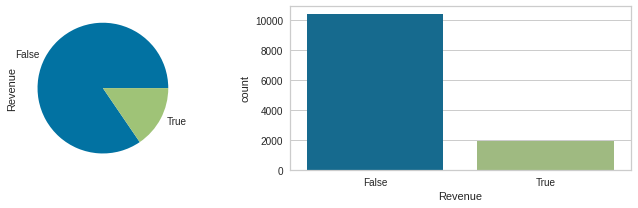

In [9]:
#labels

fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= df['Revenue'].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=df['Revenue'])
plt.tight_layout()
plt.show()

Features

Numerical Features

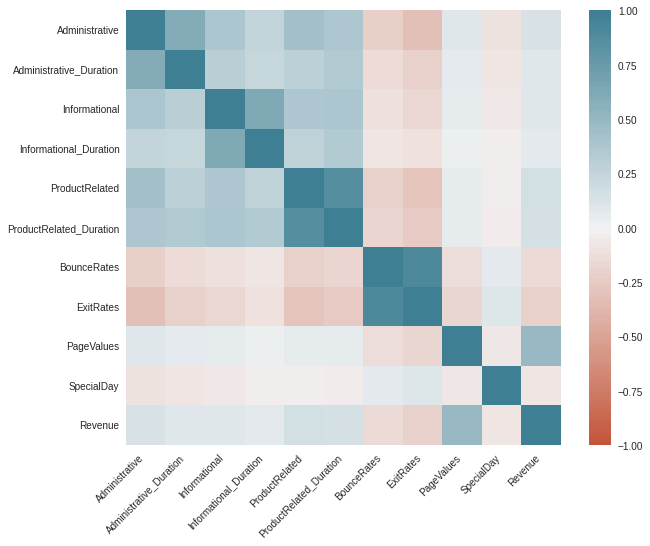

In [10]:
corr_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue']

corr = df[corr_features].corr()

plt.figure(figsize=(10, 8))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

The numerical features with highest positive correlation with Revenue are PageValues and ProductRelated (positive correlation), while those with highest negative correlation are ExitRates and BounceRates. The heat map also shows that BounceRates and ExitRates have a high negative correlation, which could lead to multicolinearity, so I will drop BounceRates from future analyses, as ExitRates have higher correlation with Revenue. In that same line or reasoning, I will also drop Administration_Duration, Informational_Duration, and ProductRelated_Duration, as they are highly correlated with Administration, Informational, and Product_Related, respectivelly. SpecialDay will also be dropped due to low correlation with Revenue.

Categorical Features

Looking a Chi-Square for contingency tables.

In [11]:
cat_features = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

for cat in cat_features:
  contigency = pd.crosstab(df[cat], df['Revenue'])
  c, p, dof, expected = chi2_contingency(contigency)
  print('Chi-Square p-value for', cat, p)

Chi-Square p-value for OperatingSystems 1.4160941129614401e-13
Chi-Square p-value for Browser 0.00608754317955109
Chi-Square p-value for Region 0.3214249979076556
Chi-Square p-value for TrafficType 1.652735258160153e-67
Chi-Square p-value for VisitorType 4.269904152293867e-30
Chi-Square p-value for Weekend 0.0012663251061221968


The p-values for the Chi-Square tests above indicate that, among the categorical features, Region would provide little help the model predict the probabilities of purchase, so that variable will be dropped from future analyses.

Checking for missing data.

In [12]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Task 1: Supervised Learning

Train-Test split

In [13]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [14]:
train = df[(df['Month'] == 'June') | (df['Month'] == 'Jul') | (df['Month'] == 'Aug') | (df['Month'] == 'Sep') | (df['Month'] == 'Oct') | (df['Month'] == 'Nov') | (df['Month'] == 'Dec')]
test = df[(df['Month'] == 'Feb') | (df['Month'] == 'Mar')]

#dropping month column
train.drop(columns=['Month'], inplace=True)
test.drop(columns=['Month'], inplace=True)

#shape
print(train.shape)
print(test.shape)

(6875, 17)
(2091, 17)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
X_train = train[['Administrative', 'Informational', 'ProductRelated', 'ExitRates', 'PageValues',
                 'OperatingSystems', 'Browser', 'TrafficType', 'VisitorType', 'Weekend']]
y_train = train['Revenue']
X_test = test[['Administrative', 'Informational', 'ProductRelated', 'ExitRates', 'PageValues',
                 'OperatingSystems', 'Browser', 'TrafficType', 'VisitorType', 'Weekend']]
y_test = test['Revenue']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6875, 10)
(6875,)
(2091, 10)
(2091,)


Preprocessing

In [16]:
#grouping columns by type

numeric_features = ['Administrative', 'Informational', 'ProductRelated', 'ExitRates', 'PageValues']

categorical_features = ['OperatingSystems', 'Browser', 'TrafficType', 'VisitorType']

binary_features = ['Weekend']

#preprocessing by column type

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=False))  
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler(with_mean=False))
])

binary_transformer = Pipeline(steps=[
    ('ordenc', OrdinalEncoder()),
    ('scaler', StandardScaler(with_mean=False))
])

preprocessor = ColumnTransformer(
    transformers=[
    ('num', numerical_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
    ('bin', binary_transformer, binary_features)
])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(6875, 44)
(2091, 44)


Baseline Classifier: Logistic Regression

In [17]:
lr = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=39)

folds = StratifiedKFold(n_splits = 5, shuffle = True)

params = {'C': [0.1, 0.5, 1, 2, 5, 10]}

gs = GridSearchCV(
    lr,
    param_grid=params,
    scoring='f1_micro',
    return_train_score=True,
    cv = folds
)

gs.fit(X_train, y_train)

print('Best Estimator: ', gs.best_estimator_)
print('F1 Score: ', gs.best_score_)

Best Estimator:  LogisticRegression(C=5, class_weight='balanced', max_iter=10000,
                   random_state=39)
F1 Score:  0.8206545454545455


Predictions on the test set.

In [18]:
y_pred = gs.predict(X_test)

cmtp=confusion_matrix(y_test, y_pred)
acc  = accuracy_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
print(f'F1-score = {f1}, Precision = {prec}, Recall = {rec}, Accuracy = {acc}')
print('Confusion Matrix:')
print(cmtp)

F1-score = 0.6792452830188681, Precision = 0.574468085106383, Recall = 0.8307692307692308, Accuracy = 0.926829268292683
Confusion Matrix:
[[1776  120]
 [  33  162]]


Advanced Classifier: Random Forest Classifier

In [20]:
rf = RandomForestClassifier(class_weight='balanced', random_state=39)

folds = StratifiedKFold(n_splits = 5, shuffle = True)

parameters = {
    'n_estimators': range(100, 500, 100),
    'max_depth': range(5, 15, 2),
    'min_samples_split': range(2, 10, 2),
}

gs = GridSearchCV(
    rf,
    param_grid=parameters,
    scoring='f1_micro',
    return_train_score=True,
    cv=folds
)

gs.fit(X_train, y_train)
results = gs.cv_results_

print('Best Estimator: ', gs.best_estimator_)
print('F1 Score: ', gs.best_score_)

Best Estimator:  RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=400,
                       random_state=39)
F1 Score:  0.8538181818181819


Predictions on the test set.

In [ ]:
y_pred = gs.predict(X_test)

cmtp=confusion_matrix(y_test, y_pred)
acc  = accuracy_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
print(f'F1-score = {f1}, Precision = {prec}, Recall = {rec}, Accuracy = {acc}')
print('Confusion Matrix:')
print(cmtp)

F1-score = 0.7724425887265137, Precision = 0.6514084507042254, Recall = 0.9487179487179487, Accuracy = 0.9478718316594931
Confusion Matrix:
[[1797   99]
 [  10  185]]


The Random Forest Classifier is an improvement to the Linear Regression Classifier, based on the higher F1-Score for the training model, as well as on the performance on the test set in general.

Feature Importance.

In [ ]:
featimp = pd.DataFrame(gs.best_estimator_.feature_importances_).sort_values(by=0, ascending=False).reset_index().head(5)
featimp.rename(columns={0: 'Feature_Importance'}, inplace=True)
featimp.head()

,index,Feature_Importance
0,4,0.451554
1,3,0.148949
2,2,0.120266
3,0,0.071373
4,1,0.032961


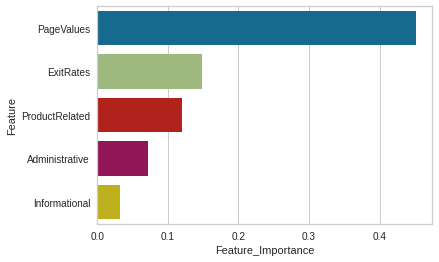

In [ ]:
dict_features = {0: 'Administrative', 1: 'Informational', 2: 'ProductRelated', 3: 'ExitRates', 4: 'PageValues'}

featimp['Feature'] = featimp['index'].map(dict_features)
featimp.drop('index', axis=1, inplace=True)
featimp.set_index('Feature')

sns.barplot(x="Feature_Importance", y="Feature", data=featimp);

The chart above shows the top-5 features in our model. PageValues, the variable with highest correlation with the label, as shown in the descriptive analysis, is the most important variable in the model, followed by ExitRates, ProductRelated, Administrative, and Informational.

# Task 2: Unsupervised Learning

Reading data and splitting it into X and y.

In [ ]:
#Data source

df = pd.read_csv('/content/drive/My Drive/FourthBrain/Assignments/Midterm/online_shoppers_intention.csv')
X = df.drop('Month', axis=1)
y = X.pop('Revenue')
print(X.shape)
print(y.shape)

(12330, 16)
(12330,)


Data preprocessing

In [ ]:
#grouping columns by type

numeric_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

categorical_features = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']

binary_features = ['Weekend']

#preprocessing by column type

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=False))  
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler(with_mean=False))
])

binary_transformer = Pipeline(steps=[
    ('ordenc', OrdinalEncoder()),
    ('scaler', StandardScaler(with_mean=False))
])

preprocessor = ColumnTransformer(
    transformers=[
    ('num', numerical_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
    ('bin', binary_transformer, binary_features)
])

X = preprocessor.fit_transform(X)

print(X.shape)

(12330, 64)


Reducing dimensionality using TruncatedSVD to improve computation.

In [ ]:
tsvd = TruncatedSVD(2, random_state=39)

X_pca = tsvd.fit_transform(X)
X_pca.shape

(12330, 2)

Finding optimal number of clusters.

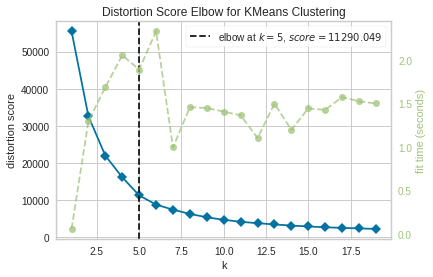

In [ ]:
model = KMeans(random_state=39)
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(X_pca) 
visualizer.show()

Using the Elbow method, the optimal number of clusters for this analysis is five.

Generating the clusters identified above.

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state=39)

cluster = kmeans.fit_predict(X_pca)

print(cluster)

[1 2 1 ... 1 2 3]


Visualizing clusters

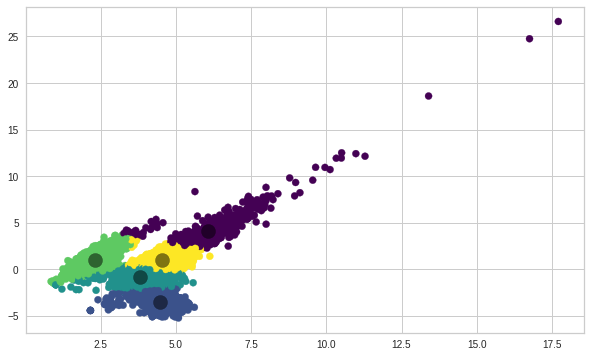

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show();

Adding cluster identification as a column in the data frame.

In [ ]:
df['cluster_id'] = kmeans.labels_
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,cluster_id
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,2


Analyzing purchase behavior by cluster.

In [ ]:
df['Revenue'] = df['Revenue'].astype(int)
df['Count'] = 1

df_gb = df.groupby('cluster_id').agg({'Count': 'sum', 
                                      'Revenue' : 'mean',
                                      'Administrative': 'mean',
                                      'Informational': 'mean',
                                      'ProductRelated': 'mean',
                                      'BounceRates': 'mean',
                                      'ExitRates': 'mean',
                                      'PageValues': 'mean',
                                      'SpecialDay': 'mean'}).sort_values(by='Revenue')

df_gb

,Count,Revenue,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay
cluster_id,,,,,,,,,
1,1181,0.005080,0.052498,0.008467,3.685013,0.152537,0.169357,0.005610,0.128874
2,5591,0.083169,0.893221,0.109104,17.992488,0.012228,0.040112,2.527548,0.080451
4,3190,0.242320,4.104075,0.912226,49.760815,0.005922,0.020682,10.009559,0.035674
3,1665,0.254655,2.544745,0.291291,17.822222,0.001567,0.017045,11.024358,0.016577
0,703,0.341394,8.763869,3.120910,139.246088,0.005134,0.017715,11.650574,0.019915


Cluster 0 has the smallest number of samples, but the highest proportion (over 34%) of purchases made. Clusters 3 and 4 are next, with 25% and 24% of interactions resulting in purchases.

In general, clusters with the highest revenue are also those with the highest values for Administrative, Informational, ProductRelated, and PageValues, while having low values for BounceRates, ExitRates, and SpecialDay.

Cluster 1 has the lowest revenue rate, and in this cluster we can observe the highest BounceRates, ExitRates, and average SpecialDay.

Cluster 2 is the largest one, but shows the second lowest revenue rate, as well as the second highest rates for BounceRates, ExitRates, and SpecialDay.

In [ ]:
pd.crosstab(df['cluster_id'], df['VisitorType'], normalize='index')

VisitorType,New_Visitor,Other,Returning_Visitor
cluster_id,,,
0,0.036984,0.000000,0.963016
1,0.021169,0.013548,0.965284
2,0.004829,0.002504,0.992667
3,0.966366,0.032432,0.001201
4,0.002194,0.000313,0.997492


Most visitors in cluster 3, the cluster with second-highest purchase rate are new visitors, while the majority of visitors in the other four clusters are returning visitors.

# Task 3: Semi-Supervised Learning

Train-test split.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/FourthBrain/Assignments/Midterm/online_shoppers_intention.csv')

df_labeled = df[(df['Month'] == 'June') | (df['Month'] == 'Jul') | (df['Month'] == 'Aug') | (df['Month'] == 'Sep')]
X_labeled = df_labeled[['Administrative', 'Informational', 'ProductRelated', 'ExitRates', 'PageValues',
                 'OperatingSystems', 'Browser', 'TrafficType', 'VisitorType', 'Weekend']]
y_labeled = df_labeled['Revenue']

df_unlabeled = df[(df['Month'] == 'Oct') | (df['Month'] == 'Nov') | (df['Month'] == 'Dec')]
X_unlabeled = df_unlabeled[['Administrative', 'Informational', 'ProductRelated', 'ExitRates', 'PageValues',
                 'OperatingSystems', 'Browser', 'TrafficType', 'VisitorType', 'Weekend']]
y_unlabeled = df_unlabeled['Revenue']

df_test = df[(df['Month'] == 'Feb') | (df['Month'] == 'Mar')]
X_test = test[['Administrative', 'Informational', 'ProductRelated', 'ExitRates', 'PageValues',
                 'OperatingSystems', 'Browser', 'TrafficType', 'VisitorType', 'Weekend']]
y_test = test['Revenue']

print(X_labeled.shape)
print(y_labeled.shape)
print(X_unlabeled.shape)
print(y_unlabeled.shape)
print(X_test.shape)
print(y_test.shape)

(1601, 10)
(1601,)
(5274, 10)
(5274,)
(2091, 10)
(2091,)


Data preprocessing

In [ ]:
#grouping columns by type

numeric_features = ['Administrative', 'Informational', 'ProductRelated', 'ExitRates', 'PageValues']

categorical_features = ['OperatingSystems', 'Browser', 'TrafficType', 'VisitorType']

binary_features = ['Weekend']

#preprocessing by column type

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=False))  
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler(with_mean=False))
])

binary_transformer = Pipeline(steps=[
    ('ordenc', OrdinalEncoder()),
    ('scaler', StandardScaler(with_mean=False))
])

preprocessor = ColumnTransformer(
    transformers=[
    ('num', numerical_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
    ('bin', binary_transformer, binary_features)
])

X_labeled = preprocessor.fit_transform(X_labeled)
X_unlabeled = preprocessor.transform(X_unlabeled)
X_test = preprocessor.transform(X_test)

print(X_labeled.shape)
print(X_unlabeled.shape)
print(X_test.shape)

(1601, 41)
(5274, 41)
(2091, 41)


Concatenating X data sets and turning new data set from sparse matrix into a numpy array.

In [ ]:
X = vstack((X_labeled, X_unlabeled)).toarray()
X.shape

(6875, 41)

Concatenating y_labeled and a dummy label fo X_unlabeled.

In [ ]:
#concatenating y_train data and a 

y = np.concatenate((y_labeled, -np.ones(X_unlabeled.shape[0])))
y.shape

(6875,)

Instantiating the LabelSpreading algorithm and fitting on the dataset.

In [ ]:
lsm = LabelSpreading(kernel='knn', alpha=0.01)

lsm.fit(X, y)

LabelSpreading(alpha=0.01, kernel='knn')

Generating predictions for the unlabeled data set.

In [ ]:
y_pred = lsm.transduction_
y_pred = y_pred[y_labeled.shape[0]: ]
y_pred.shape

(5274,)

Classification performance on the unlabeled data set.

In [ ]:
cmtp=confusion_matrix(y_unlabeled, y_pred)
acc  = accuracy_score(y_unlabeled, y_pred)
rec  = recall_score(y_unlabeled, y_pred)
prec = precision_score(y_unlabeled, y_pred)
f1   = f1_score(y_unlabeled, y_pred)
print(f'F1-score = {f1}, Precision = {prec}, Recall = {rec}, Accuracy = {acc}')
print('Confusion Matrix:')
print(cmtp)

F1-score = 0.3403487672880337, Precision = 0.49475524475524474, Recall = 0.25939505041246563, Accuracy = 0.791998483124763
Confusion Matrix:
[[3894  289]
 [ 808  283]]


The model accuracy for the self-labeled data set is 79%.

Classification performance on Feb-March data using labeled data only.

In [ ]:
lr = LogisticRegression(max_iter=10000).fit(X_labeled, y_labeled)

y_pred = lr.predict(X_test)

cmtp=confusion_matrix(y_test, y_pred)
acc  = accuracy_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
print(f'F1-score = {f1}, Precision = {prec}, Recall = {rec}, Accuracy = {acc}')
print('Confusion Matrix:')
print(cmtp)

F1-score = 0.5190311418685122, Precision = 0.7978723404255319, Recall = 0.38461538461538464, Accuracy = 0.9335246293639407
Confusion Matrix:
[[1877   19]
 [ 120   75]]


Classification performance on Feb-March data set using self-labeled data.

In [ ]:
y_hat = lsm.predict(X_test)

cmtp=confusion_matrix(y_test, y_hat)
acc  = accuracy_score(y_test, y_hat)
rec  = recall_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
f1   = f1_score(y_test, y_hat)

print(f'F1-score = {f1}, Precision = {prec}, Recall = {rec}, Accuracy = {acc}')
print('Confusion Matrix:')
print(cmtp)

F1-score = 0.3344262295081968, Precision = 0.4636363636363636, Recall = 0.26153846153846155, Accuracy = 0.9029172644667623
Confusion Matrix:
[[1837   59]
 [ 144   51]]


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Overall, the performance of the supervised model is slightly higher than the performance of the semi-supervised model, as indicated by all four metrics used for evaluation. In any case, the accuracy for the semi-supervised algorithm on the test data is over 90%.